# <div style = 'background-color:#50474E'> <center><font color='#F2DD6C'>Machine Learning aplicado a la detección de fraudes en E-commerce</div><div style = 'background-color:#50474E'> <center>.<font color='#50474E'></div>

#### Indice

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Preparación y limpieza de los datos](#0)<br>
2.  [Analisis exploratorio de los datos](#1)<br>
3.  [Modelado y evaluación](#2) <br>
4.  [Concluciones](#3) <br>

</div>

## <div style = 'background-color:#50474E'> <center><font color='white'>① Preparación y limpieza de los datos </font></div> <a id="0"></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning) # Borrar warnings

Comienzo el analisis cargando los 2 set de datos sobre transacciones

In [2]:
# Cargo los dos dataframes.
df_1=pd.read_csv("Fraude_Ecommerce/cust_transaction_details.csv")
df_2=pd.read_csv("Fraude_Ecommerce/Customer_DF.csv")

In [3]:
df_1.head(3)

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled


In [4]:
df_2.head(3)

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


Ambos tienen la columna "customerEmail" donde coinciden en nombre y es el identificador común.
Por lo tanto, la unión correcta es un LEFT JOIN desde DF1 a DF2, para agregar la información del cliente a cada transacción.

In [7]:
df = df_1.merge(df_2, on="customerEmail", how="left") # Se agrega el dataframe df_2 al df_1 en los que coincida el email, en el resto sera NAN.

In [8]:
df.sample(3)

,Unnamed: 0_x,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Unnamed: 0_y,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
758,590,andre74@patrick-decker.com,sdvzm88k,nfryte,6umtakhhu,0,apple pay,VISA 16 digit,46,1,fulfilled,161,150-073-8610,4gfo1e3xeirjanhwko92,d89c:db0:5ff9:a150:9e6c:482d:c900:fb33,"55197 Jeffrey Burgs Suite 700\nGardnerport, VA...",5,4,4,True
349,240,johnlowery@gmail.com,aoyfjmwf,9eubwc,opyep1aoj,0,card,VISA 16 digit,12,0,fulfilled,79,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",2,2,1,True
92,50,christineklein@wright-boyd.org,jz6qu6zy,0esxhp,ow9u8ogs4,0,card,VISA 16 digit,16,0,fulfilled,12,897-464-6425x941,j8cp1uydkuyza2eo0mir,4304:521a:e1c3:766b:21f3:ac3:4ab2:5a2,"67636 Renee Islands Suite 307\nTeresaview, ND ...",4,4,3,False


In [9]:
# Borro estas columnas que no voy a utilizar por no ser relevantes.
df = df.drop(columns=["Unnamed: 0_x"])
df = df.drop(columns=["Unnamed: 0_y"])
df = df.drop(columns=['customerPhone'])

In [10]:
# Renombro columnas.
df.columns=['e-mail', 'Trans_ID', 'Orden_ID', 'Metodo_Pago', 'Error_Metodo_Pago', 'Tipo_Metodo_Pago', 'Proveed_Metodo_Pago', 'Trans_Monto', 'Fallo_Transaccion', 'Estado', 'Dispositivo', 'Cliente_IP', 'Domic_Factura', 'N°_Transaccion', 'N°_Orden', 'N°_Pagos', 'Fraude']

In [11]:
df.sample(3)

,e-mail,Trans_ID,Orden_ID,Metodo_Pago,Error_Metodo_Pago,Tipo_Metodo_Pago,Proveed_Metodo_Pago,Trans_Monto,Fallo_Transaccion,Estado,Dispositivo,Cliente_IP,Domic_Factura,N°_Transaccion,N°_Orden,N°_Pagos,Fraude
438,tayloreric@gmail.com,58xj4057,zwxx7h,ktxquppwn,0,card,Voyager,15,0,failed,sjoj10iss04dq90i4w7x,3.75.86.140,"3195 Farmer Mills Apt. 946\nBrittanymouth, IA ...",4,3,2,False
702,johnlowery@gmail.com,ckvws967,b8mpa4,hs3hemcz6,0,card,Maestro,22,0,fulfilled,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,True
559,amywright@wallace-johnson.com,aus7niea,y942bm,88huac0bv,1,bitcoin,VISA 16 digit,32,0,fulfilled,n29he2b6a841zcbiw2i9,254.155.117.48,"403 Anna Center Apt. 947\nMeganhaven, GA 46627",6,6,1,True


In [12]:
# Datos estadisticos basicos de las columnas numericas del dataframe.
df.describe()

,Error_Metodo_Pago,Trans_Monto,Fallo_Transaccion,N°_Transaccion,N°_Orden,N°_Pagos
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,0.100122,35.147741,0.256410,5.195360,3.808303,2.135531
std,0.300346,19.640072,0.436918,2.924214,1.866872,1.860001
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,3.000000,3.000000,1.000000
50%,0.000000,34.000000,0.000000,5.000000,4.000000,2.000000
75%,0.000000,46.000000,1.000000,7.000000,5.000000,3.000000
max,1.000000,353.000000,1.000000,15.000000,8.000000,15.000000


In [13]:
# Contar valores nulos de cada campo y mostrar la suma de ellos.
df.isnull().sum()

e-mail                 0
Trans_ID               0
Orden_ID               0
Metodo_Pago            0
Error_Metodo_Pago      0
Tipo_Metodo_Pago       0
Proveed_Metodo_Pago    0
Trans_Monto            0
Fallo_Transaccion      0
Estado                 0
Dispositivo            0
Cliente_IP             0
Domic_Factura          0
N°_Transaccion         0
N°_Orden               0
N°_Pagos               0
Fraude                 0
dtype: int64

In [14]:
df.duplicated().sum() # Mostrar número de filas duplicadas.

0

Comienzo a ver los campos en este set de datos, para entender como estan compuestos

In [15]:
# Mostrar cuantas veces se repite un mismo e-mail en el dataset.
df['e-mail'].value_counts()

e-mail
johnlowery@gmail.com           224
mitchellgriffith@yahoo.com      15
tmcpherson@wright.com           13
lleonard@turner-fleming.com     11
david45@gmail.com               10
                              ... 
victorgarcia@gmail.com           1
oaguirre@hotmail.com             1
aweaver@yahoo.com                1
richard05@hanson-key.org         1
veronica42@stokes.com            1
Name: count, Length: 136, dtype: int64

Nota: Se observa una particularidad: el primer correo electrónico aparece repetido 224 veces, lo cual resulta llamativo. Por ello procedo a filtrar el conjunto de datos para mostrar únicamente las filas correspondientes a este email, con el objetivo de determinar cuántas de estas transacciones son fraudulentas. A continuación repito el mismo procedimiento para los dos correos siguientes en orden de frecuencia de aparición.

In [16]:
# Identifico el email mas frecuente (el que se repite 224 veces), al poner index[0] muestro el primer valor.
email_repetido = df['e-mail'].value_counts().index[0]

# Filtro el dataframe con las filas donde se cumple que el email es el primero de la lista
control = df[df['e-mail'] == email_repetido]

In [17]:
control['Fraude'].value_counts()

Fraude
True    224
Name: count, dtype: int64

Se observa que todas las transacciones asociadas a este email han sido catalogadas como fraudulentas. Esta recurrencia sugiere que existe un comportamiento sistemático vinculado a este usuario, lo que lo convierte en un caso de particular interés dentro del análisis de fraude. Procedo a realizar el mismo análisis con los siguientes correos más frecuentes; aunque no se repiten tanto como el primero, podrían arrojar resultados similares.

In [18]:
# Identifico ahora el segundo email más frecuente colocando index[1]
email_repetido2 = df['e-mail'].value_counts().index[1]

# Filtro el DataFrame donde la columna e-mail es igual a ese 2 email
control2 = df[df['e-mail'] == email_repetido2]

In [19]:
control2['Fraude'].value_counts()

Fraude
False    15
Name: count, dtype: int64

En este caso el segundo mail con mas operaciones no tiene actividad clasificada como fraudulenta. 

In [20]:
# Identifico el tercer email más frecuente (colocando index[2])
email_repetido3 = df['e-mail'].value_counts().index[2]

# Filtro los datos donde la columna e-mail sea igual a ese tercero de la lista.
control3 = df[df['e-mail'] == email_repetido3]

In [21]:
control3['Fraude'].value_counts()

Fraude
True    13
Name: count, dtype: int64

En este tercer escenario vuelve a presentarse una situación atípica: de las 13 transacciones registradas, la totalidad fue identificada como fraudulenta. Tambien para tener en consideracion que un grupo tan homogéneo podría implicar un sesgo en los datos o una falla en el proceso de clasificación previo.

#### Proceso de transformación/codificación de datos categoricos

En el caso del campo de correo electrónico, considero que su comportamiento es especialmente relevante por lo que quiero incluirlo en el análisis. Es necesario convertirlo a valores numéricos, pero no mediante una codificación tipo one-hot ya que esto generaría demasiadas columnas adicionales. Por otro lado, usar un label encoder no reflejaría adecuadamente la importancia de los patrones de repetición que busco capturar. Por esta razón la forma más conveniente de codificar este campo es mediante codificación por frecuencia, asignando a cada email un valor proporcional a la cantidad de veces que aparece en el conjunto de datos.

In [22]:
# Obtengo nuevamente cuanto se repiten los valores y lo grabo en una nueva variable fr_1.
fr_1 = df['e-mail'].value_counts()

# Mapeo las frecuencias optenidas y actualizo el campo con los nuevos valores que serian las frecuencias.
df['e-mail'] = df['e-mail'].map(fr_1)

En el proximo campo a transformar tengo "Tipo_Metodo_Pago" donde los posibles resultados son 4. Lo mas razonable en este caso es usar one-hot encoding puesto que no se estarian generando muchas columnas adicionales.

In [23]:
df['Tipo_Metodo_Pago'].value_counts()

Tipo_Metodo_Pago
card         647
bitcoin       68
paypal        55
apple pay     49
Name: count, dtype: int64

In [24]:
df = pd.get_dummies(df, columns=['Tipo_Metodo_Pago'], prefix='M.P.') # prefix agrega al comienzo de cada columna ese texto.

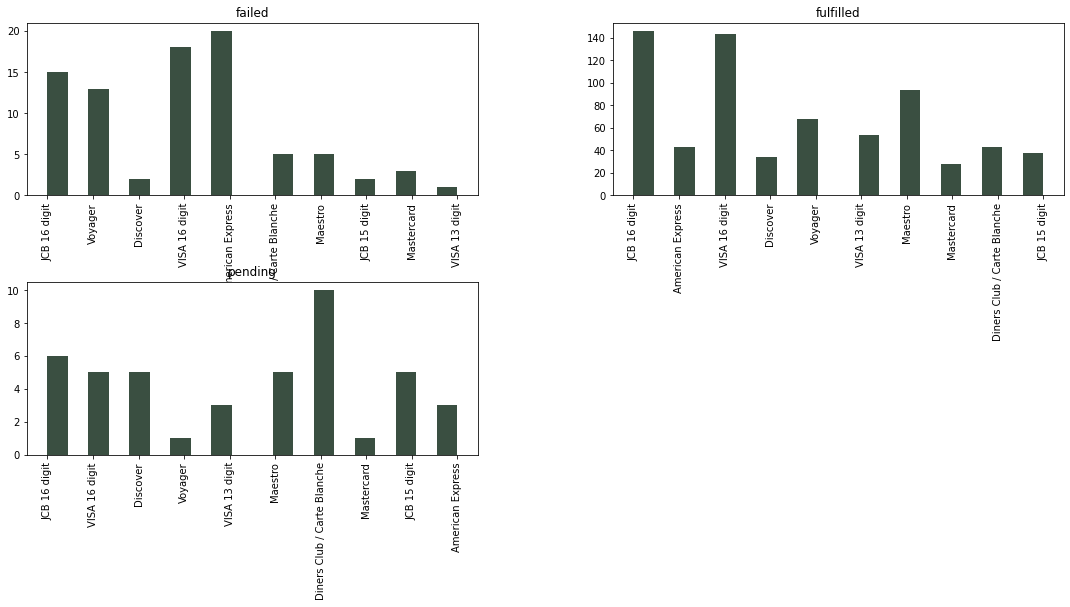

In [25]:
# Visualización de la composición del campo y relación con "Estado" antes de ser convertido a variables numericas.
_=df['Proveed_Metodo_Pago'].hist(by=df['Estado'], figsize=[18,8], bins=20, color='#3A4F41')

In [26]:
df['Proveed_Metodo_Pago'].value_counts()

Proveed_Metodo_Pago
JCB 16 digit                   167
VISA 16 digit                  166
Maestro                        104
Voyager                         82
American Express                66
VISA 13 digit                   58
Diners Club / Carte Blanche     58
JCB 15 digit                    45
Discover                        41
Mastercard                      32
Name: count, dtype: int64

In [27]:
promedio_fraude = df.groupby('Proveed_Metodo_Pago')['Fraude'].mean() # Agrupo por frecuencia y tomo el promedio respecto a fraude.
df["Proveed_Metodo_Pago"] = df["Proveed_Metodo_Pago"].map(promedio_fraude)

El campo "Estado" puede asumir tres posibles valores. Para poder utilizarlo asigno una escala numérica que refleja la gravedad o importancia de cada estado: por ejemplo un estado “incompleto” (failed) recibe un valor menor 0, “pendiente” (pending) un valor intermedio 1 y “completado” (fullfilled) un valor más alto 3. De esta manera en la codificación convierte los datos a formato numérico y también se preserva la jerarquía de relevancia entre los distintos estados.

In [28]:
df['Estado'].value_counts()

Estado
fulfilled    691
failed        84
pending       44
Name: count, dtype: int64

In [29]:
# Cambio las palabras de los resultados de este campo por numeros, asignando esta escala 0, 1 y 3 segun este terminado.
df['Estado'] = df['Estado'].replace({
    'failed': 0,
    'fulfilled': 3,
    'pending': 1
})

El numero de IP es uno de esos datos donde el valor literal no importa pero sus patrones de uso sí. Voy a intentar construir caracteristicas utiles a partir de estos datos relacionandolos con otros. Con esto se generaran nuevas columnas que me serviran para entrenar los modelos de clasificación.

In [30]:
df['Cliente_IP'].value_counts()

Cliente_IP
e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788     28
212.144.68.190                             28
f82c:811f:8a02:e2d6:79b:fcaa:42de:570b     28
f259:657f:f329:2fca:c06c:8b57:d6ac:2380    28
163.128.139.42                             28
                                           ..
81.13.103.118                               1
89e:31aa:e9e2:90ea:aa00:4a8c:805c:20ea      1
2432:d9dc:c6ad:ef9c:c5df:b7bf:1b48:4444     1
acba:ba43:ae87:641c:3009:8355:c6ff:15b9     1
172.69.105.137                              1
Name: count, Length: 140, dtype: int64

In [31]:
# Codificación por Frecuencia, busco medir la frecuencia de uso de cada IP.
frecuencia_IP = df['Cliente_IP'].value_counts()
df['Frecuencia_IP'] = df['Cliente_IP'].map(frecuencia_IP)

In [32]:
# Crear una nueva columna llamada Tipo_IP aplicando una función fila por fila. Si contiene "." asigna 4, si no contiene asigna 6. 
# Porque las IPv4 tienen notación con puntos, ej. 192.168.0.1 y las IPv6 usa ":" y hexadecimales por ej. 2001:0db8:85a3
df['IP_tipo'] = df['Cliente_IP'].apply(lambda x: 4 if '.' in x else 6)

In [33]:
df = df.drop(columns=['Cliente_IP']) # Borro el campo pues ya cree 2 nuevos usando datos de esta columna.

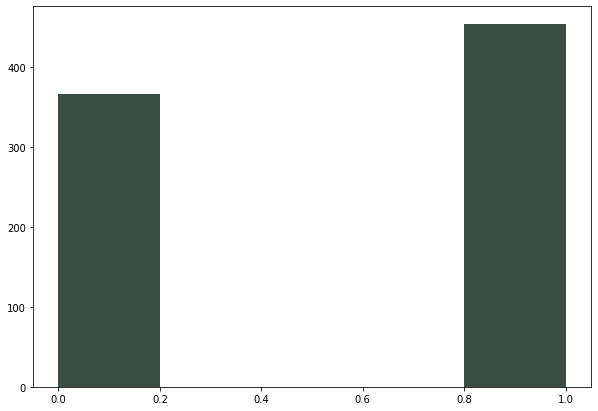

In [34]:
df['Fraude_num'] = df['Fraude'].astype(int) # Convierto la columna a numericos (antes era booleano)
_=df['Fraude_num'].hist(grid=False, bins=5, figsize=[10,7], color='#3A4F41')

# _= es para quitar textos y la impresion de array y datos, queda solo el gráfico

In [35]:
df = df.drop(columns=['Fraude']) # Borro la columna Fraude que ya no voy a utilizar porque cree otra numerica.
df = df.rename(columns={'Fraude_num': 'Fraude'})

In [36]:
df.sample(3)

,e-mail,Trans_ID,Orden_ID,Metodo_Pago,Error_Metodo_Pago,Proveed_Metodo_Pago,Trans_Monto,Fallo_Transaccion,Estado,Dispositivo,...,N°_Transaccion,N°_Orden,N°_Pagos,M.P._apple pay,M.P._bitcoin,M.P._card,M.P._paypal,Frecuencia_IP,IP_tipo,Fraude
203,224,i25dewqi,kr2w5f,tfff8yjzo,0,0.575758,32,1,0,jz66ap43id2y35ivfqa5,...,0,0,1,False,False,True,False,28,6,1
303,224,qenelvvf,3ougge,opyep1aoj,0,0.692771,11,1,3,6qy6oa3nqutsyyxzc54c,...,6,5,3,False,False,True,False,28,6,1
94,4,nw0a0y9s,ooxrwm,o2ct2h9fp,0,0.375000,43,0,3,qsxqbn6qjxkni7f813qn,...,4,2,1,False,False,True,False,4,4,0


## <div style = 'background-color:black'> <center><font color='white'>② Analisis exploratorio de los datos (EDA) </font></div><a id="1"></a>

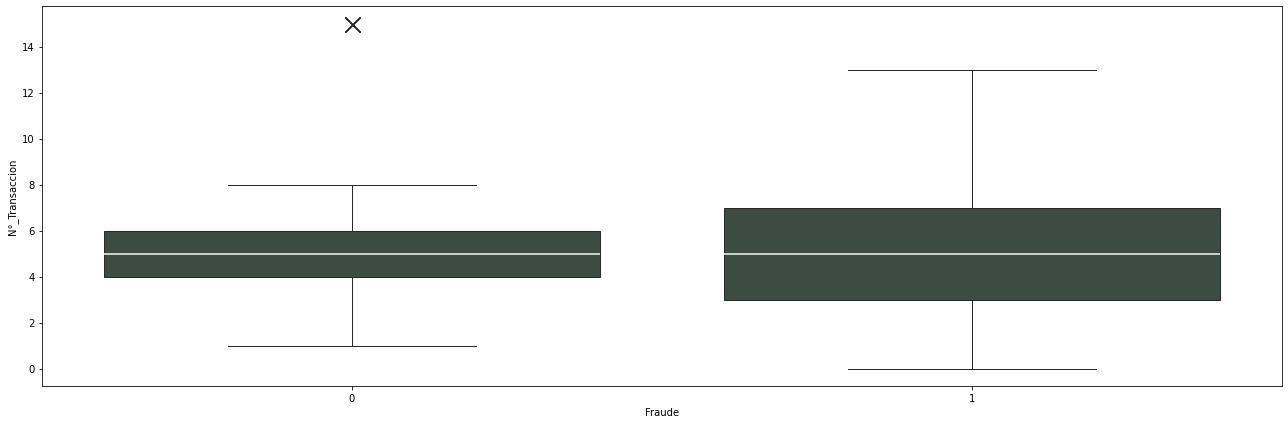

In [37]:
fig = plt.figure(figsize=(18, 6))

sns.boxplot(
    x='Fraude',
    y='N°_Transaccion',
    data=df,
    color='#3A4F41',
    fliersize=15, # Tamaño outliers
    flierprops={'marker':'x', 'color':'red', 'alpha':0.5}, # Forma y otras opciones de las marcas de outliers
    medianprops={'color':'#C9CECF', 'linewidth':2} # Codigo para graficar mediana en gris
)

plt.tight_layout()
plt.show()


Con respecto a las transacciones no fraudulentas, muestra una forma que se aproxima a la simetría, aunque con un ligero sesgo. El rango intercuartílico es relativamente pequeño, lo que indica que el 50% central de las transacciones presenta una baja variabilidad. Se observa una ligera asimetría negativa (hacia la izquierda) ya que el bigote inferior es un poco más largo que el superior. La presencia de valores atípicos se limita al extremo superior de la distribución, específicamente en valores superiores a las 14 transacciones.

Las transacciones fraudulentas estan mostrando mayor dispersión general, una mayor variabilidad. El rango intercuartílico es mayor que el del grupo no fraudulento indicando que el 50% central de los datos está más disperso. Los extremos también son más largos. Tambien se observa una clara asimetría positiva (hacia la derecha) ya que el extremo superior muestra una mayor dispersión que el extremo inferior.

En ambas cajas la mediana es similar, lo que sugiere que el valor típico de la cantidad de transacciones es parecido en ambos grupos.

<AxesSubplot:xlabel='Fraude', ylabel='N°_Pagos'>

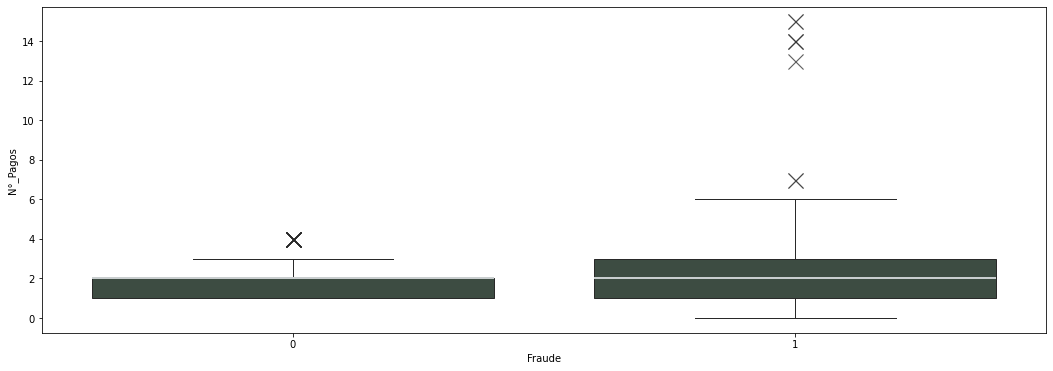

In [38]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='Fraude', y='N°_Pagos', data=df, color='#3A4F41', fliersize=15,           # tamaño de los outliers
    flierprops={'marker':'x', 'color':'red', 'alpha':0.5}, medianprops={'color':'#C9CECF', 'linewidth':2})

Aqui comparando la cantidad de pagos con respecto a si fue catalogado como fraude o no. En el primer caso las catalogadas sin fraude muestran un muy pequeño rango intercuartilico, sin bigote inferior y con un pequeño bigote superior y valores atipicos en numero 4.

La caja de fraude muestra un pequeño bigote inferior, rango intercuartilico superior (su mediana es igual al Q3 de la caja no fraudulenta), un bigote superior con mucha mas variabilidad que el inferior y muchos outliers desde el 6 hasta superar los 14.

<AxesSubplot:xlabel='Fraude', ylabel='N°_Orden'>

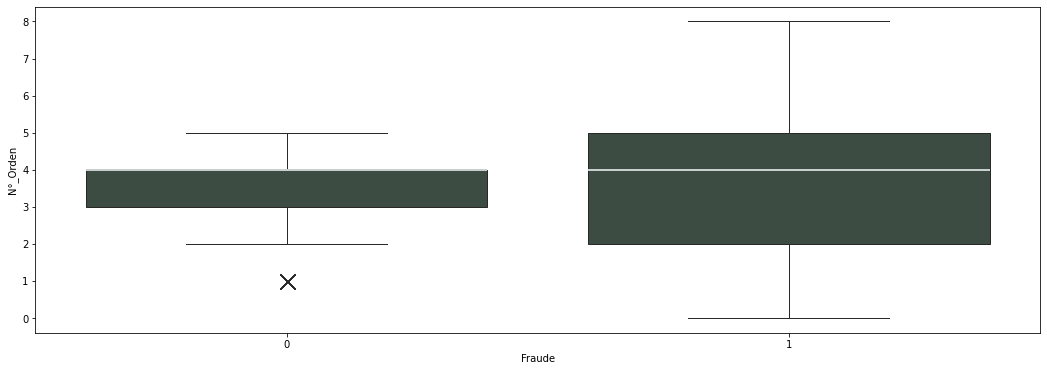

In [39]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='Fraude', y='N°_Orden', data=df, color='#3A4F41', fliersize=15,           # tamaño de los outliers
    flierprops={'marker':'x', 'color':'red', 'alpha':0.5}, medianprops={'color':'#C9CECF', 'linewidth':2})

Las operaciones que no son fraude con respecto al numero de orden tienen una distribución donde el 50% de los datos (entre los cuartiles 1 y 3) está bastante concentrado, además se observa que la mediana coincide con el tercer cuartil (tambien es igual a la mediana de la otra caja de fraudes).

Respecto a las declaradas como fraude se ve que su caja es mayor, una mayor dispersión en el 50% central de los números de orden, el rango total de números de orden en casos de fraude es mucho mayor (va de 0 a 8, mientras que la caja de la izquierda va de 2 a 5 en total). 

Comparando ambas se ve a simple vista que un número de orden por debajo de 2 o por encima de 5 es mucho más probable que esté asociado con una transacción fraudulenta ya que estos valores están fuera del rango central del grupo clasificado como operacion no fraudulenta.

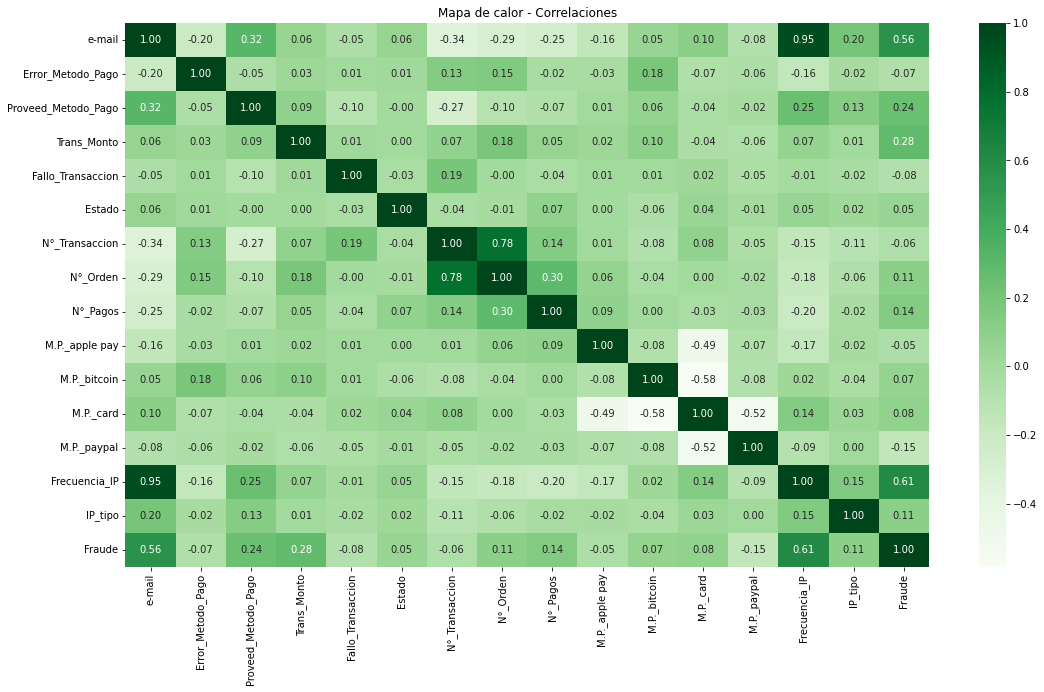

In [40]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Greens')
plt.title('Mapa de calor - Correlaciones')
plt.show()

A continuacion procedo a ver 6 campos que tienen información que no es numerica pero puede llegar a ser importante por su frecuencia de aparición, entonces para poder incluirlas en el analisis procedo a codificarlas, en el caso puntual de estos 6 campos tambien con una codificación por frecuencias para no generar tantas columnas.

In [41]:
df['Domic_Factura'].value_counts()

Domic_Factura
814 Wagner Union\nAshleymouth, HI 35617                     28
77711 Pamela Ridge\nNew Kayla, IL 27182                     28
548 Bryant Inlet\nVeronicaside, OK 00522                    28
687 Rogers Bridge Suite 780\nValdezburgh, IN 23532          28
518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945           28
                                                            ..
3604 Lyons Prairie\nAllenbury, WI 26089-9330                 1
238 Reeves Villages\nLeslieton, SD 12318-4476                1
23831 Adams Tunnel Suite 538\nNorth David, NE 92200-7011     1
85993 Heather Drive\nEast Erinhaven, KY 61109                1
Unit 6251 Box 1562\nDPO AP 54457-8709                        1
Name: count, Length: 141, dtype: int64

In [42]:
df['Orden_ID'].value_counts()

Orden_ID
3ougge    16
kanub7    16
b8mpa4    16
kr2w5f    16
0b6r24    16
          ..
7wo3i5     1
ieo8qr     1
owcp3q     1
7syvmx     1
5lmvrj     1
Name: count, Length: 478, dtype: int64

In [43]:
df['Trans_ID'].value_counts()

Trans_ID
e93zwysp    8
c5w6btep    8
i25dewqi    8
7sdl8reg    8
300mewnx    8
           ..
u2mtko2f    1
61k4wiml    1
tuyrl147    1
cattpxq6    1
wgmajf82    1
Name: count, Length: 623, dtype: int64

In [44]:
df['Metodo_Pago'].value_counts()

Metodo_Pago
opyep1aoj    56
hs3hemcz6    40
8xex97krx    24
yxsf33ipw    24
tfff8yjzo    24
             ..
xp5bh6v2n     1
rz1xfmc67     1
cf3mkd213     1
736fivko4     1
f0xnu5om9     1
Name: count, Length: 237, dtype: int64

In [45]:
df['Dispositivo'].value_counts()

Dispositivo
969zz9zdj8z4gns4sx5p    28
rjb0adai34izqvys4938    28
6qy6oa3nqutsyyxzc54c    28
tyijaify2hqadwslejyr    28
2in0fh7lep289n8dcbdz    28
                        ..
wr3wy5qmkd8qqwljulll     1
qx6nhdabeaj329zdri0o     1
ol87wpzs0jpsw13jlyko     1
x5ts382m7jezato91fjz     1
lr2c0lancqoqkosnyqnj     1
Name: count, Length: 143, dtype: int64

In [46]:
df['Domic_Factura'].value_counts()

Domic_Factura
814 Wagner Union\nAshleymouth, HI 35617                     28
77711 Pamela Ridge\nNew Kayla, IL 27182                     28
548 Bryant Inlet\nVeronicaside, OK 00522                    28
687 Rogers Bridge Suite 780\nValdezburgh, IN 23532          28
518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945           28
                                                            ..
3604 Lyons Prairie\nAllenbury, WI 26089-9330                 1
238 Reeves Villages\nLeslieton, SD 12318-4476                1
23831 Adams Tunnel Suite 538\nNorth David, NE 92200-7011     1
85993 Heather Drive\nEast Erinhaven, KY 61109                1
Unit 6251 Box 1562\nDPO AP 54457-8709                        1
Name: count, Length: 141, dtype: int64

In [47]:
# Codificación por Frecuencia de estos 5 campos.
Orden_IDD = df['Orden_ID'].value_counts()
df['Orden_ID'] = df['Orden_ID'].map(Orden_IDD) # Cambio la misma columna por los valores numericos en los 5 casos.

Trans_IDD = df['Trans_ID'].value_counts()
df['Trans_ID'] = df['Trans_ID'].map(Trans_IDD)

Mpago = df['Metodo_Pago'].value_counts()
df['Metodo_Pago'] = df['Metodo_Pago'].map(Mpago)

Disp = df['Dispositivo'].value_counts()
df['Dispositivo'] = df['Dispositivo'].map(Disp)

Domic = df['Domic_Factura'].value_counts()
df['Domic_Factura'] = df['Domic_Factura'].map(Domic)

In [48]:
pd.set_option('display.max_columns', None) # Para ver todas las columnas.
df.sample(3)

,e-mail,Trans_ID,Orden_ID,Metodo_Pago,Error_Metodo_Pago,Proveed_Metodo_Pago,Trans_Monto,Fallo_Transaccion,Estado,Dispositivo,Domic_Factura,N°_Transaccion,N°_Orden,N°_Pagos,M.P._apple pay,M.P._bitcoin,M.P._card,M.P._paypal,Frecuencia_IP,IP_tipo,Fraude
612,4,1,1,2,0,0.646341,22,0,3,4,4,4,4,2,False,False,True,False,4,4,0
601,5,1,2,5,1,0.598802,22,0,3,5,5,5,4,1,False,False,True,False,5,4,0
491,3,1,1,2,0,0.344828,17,0,3,3,3,3,3,3,False,False,True,False,3,4,1


## <div style = 'background-color:Black'> <center><font color='white'>③ Modelado y evaluación </font></div><a id="2"></a>

## ❑ Random Forest (Bosques Aleatorios)

Utilizare Random Forest para clasificar las operaciones a modo de benchmark para comparar si mejoro los resultados luego o si este sera el mejor modelo a utilizar para estos datos.

In [49]:
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Cargo datos y los divido en conjuntos para entrenar y testear.
data = df
y = data["Fraude"] # Aca le pido que Y sea mi objetivo a predecir
X = data.drop(["Fraude"], axis=1) # Aplico que X sean todas las columnas menos la del objetivo.
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     test_size=0.30,
                                     random_state=42,
                                     stratify=y) # Las proporciones se mantienen en ambos conjuntos. Tanto train como test tendrian similares cantidades de ambas clases.

In [51]:
model = RandomForestClassifier(random_state=42, 
                               n_estimators=200,
                               class_weight={0:1, 1:50},  # para darle 50 veces más peso a la clase fraude, penalizo mas los errores en la clase minoritaria.
                               max_features="log2") 
model.fit(X_train, y_train)
print(f"La precisión del Random Forest es: {model.score(X_test, y_test)}")

La precisión del Random Forest es: 0.9308943089430894


In [52]:
classifier=model.fit(X_train, y_train) #Construimos el modelo sobre los datos de entrenamiento

In [53]:
predictions=classifier.predict(X_test)

In [54]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred_adj = (y_prob >= 0.20).astype(int) # Cambio el umbral de decisión del base 0,5 al 0,2.

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_adj))
print("Accuracy:",accuracy_score(y_test, y_pred_adj))

print("Matriz de confusión")
print(confusion_matrix(y_test,y_pred_adj))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       110
           1       0.89      0.99      0.94       136

    accuracy                           0.93       246
   macro avg       0.94      0.92      0.92       246
weighted avg       0.93      0.93      0.93       246

Accuracy: 0.926829268292683
Matriz de confusión
[[ 93  17]
 [  1 135]]


<div class="alert alert-warning">  
\begin{bmatrix}
93 & 17 \\
1 & 135
\end{bmatrix}


El modelo detecta correctamente 135 fraudes y solo se le escapa 1 caso. Del lado de las operaciones legítimas clasifica bien 93 pero 17 fueron marcadas como fraude sin serlo. El modelo logra el objetivo principal que es capturar casi todos los fraudes pero a costa de generar algunas alertas falsas.

En las pruebas con distintos umbrales el valor 0.20 resultó ser el mejor punto de equilibrio entre detección de fraude y falsos positivos (mas abajo en el código estan las pruebas con diferentes umbrales).
</div>

In [56]:
df.corr(numeric_only=True)['Fraude'].sort_values(ascending=False) 
#Toda correlacion cercana a 1 o -1 no me sirve porque estaria haciendo memorizar los resultados en vez de generalizar.

Fraude                 1.000000
Frecuencia_IP          0.607210
Domic_Factura          0.583905
Dispositivo            0.574580
e-mail                 0.555366
Trans_ID               0.551515
Orden_ID               0.457536
Metodo_Pago            0.457317
Trans_Monto            0.279281
Proveed_Metodo_Pago    0.240506
N°_Pagos               0.142165
N°_Orden               0.107726
IP_tipo                0.107439
M.P._card              0.079200
M.P._bitcoin           0.065760
Estado                 0.050131
M.P._apple pay        -0.052837
N°_Transaccion        -0.062605
Error_Metodo_Pago     -0.068362
Fallo_Transaccion     -0.079607
M.P._paypal           -0.151316
Name: Fraude, dtype: float64

In [57]:
# Prueba de varios umbrales
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_proba = model.predict_proba(X_test)[:,1]

def evaluar_umbral(th):
    y_pred = (y_proba >= th).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    print(f"\nUmbral: {th}")
    print("Matriz de confusión:")
    print(cm)
    print(f"Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}")

# listado de umbrales a probar.
for t in [0.15, 0.20, 0.25, 0.30, 0.35, 0.40]:
    evaluar_umbral(t)



Umbral: 0.15
Matriz de confusión:
[[ 86  24]
 [  0 136]]
Precision: 0.850 | Recall: 1.000 | F1: 0.919

Umbral: 0.2
Matriz de confusión:
[[ 93  17]
 [  1 135]]
Precision: 0.888 | Recall: 0.993 | F1: 0.938

Umbral: 0.25
Matriz de confusión:
[[ 97  13]
 [  5 131]]
Precision: 0.910 | Recall: 0.963 | F1: 0.936

Umbral: 0.3
Matriz de confusión:
[[ 99  11]
 [  7 129]]
Precision: 0.921 | Recall: 0.949 | F1: 0.935

Umbral: 0.35
Matriz de confusión:
[[106   4]
 [  8 128]]
Precision: 0.970 | Recall: 0.941 | F1: 0.955

Umbral: 0.4
Matriz de confusión:
[[106   4]
 [ 10 126]]
Precision: 0.969 | Recall: 0.926 | F1: 0.947


<div class="alert alert-warning">Como se mostró anteriormente, el umbral 0,20 resulta ser el más adecuado. Aunque el umbral 0,15 ofrecía un Recall ligeramente mayor, 0,20 logra el mejor equilibrio, ya que mantiene un Recall alto y además obtiene el mejor F1-score entre todas las pruebas, lo que significa que mejora la detección de fraude sin aumentar en exceso los falsos positivos.</div>

#### Validación del modelo

Utilizare validación cruzada con $K = 5$ folds. Esto me dirá si el rendimiento que obtuve es consistente en diferentes subconjuntos de datos. Si es asi el modelo es estable y no está sobreajustado, de lo contrario las métricas varíaran mucho (sobreajuste).

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X, y, cv=5, scoring='roc_auc')
print("AUC promedio:", scores.mean())

AUC promedio: 0.9038156220348


<div class="alert alert-warning">Este resultado se considera muy bueno. Refleja que el modelo distingue con eficacia entre transacciones fraudulentas y legítimas. Dicho de forma simple, si tomo al azar una operación legítima y otra fraudulenta el modelo acertará cuál es cuál en alrededor del 90% de los casos.</div>

#### Interpretabilidad

##### A. Importancia de las Características (Feature Importance)
Identifico las caracteristicas que el modelo uso como más predictivas.

In [59]:
importancias = classifier.feature_importances_
features = X.columns 

df_importancia = pd.DataFrame({
    'Feature': features,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

print(df_importancia)

                Feature  Importancia
6           Trans_Monto     0.146011
5   Proveed_Metodo_Pago     0.137410
12             N°_Orden     0.089443
3           Metodo_Pago     0.088854
13             N°_Pagos     0.067107
18        Frecuencia_IP     0.058340
2              Orden_ID     0.055489
11       N°_Transaccion     0.053282
9           Dispositivo     0.044308
19              IP_tipo     0.043955
0                e-mail     0.041875
10        Domic_Factura     0.039811
17          M.P._paypal     0.034087
4     Error_Metodo_Pago     0.022491
8                Estado     0.019434
16            M.P._card     0.018204
14       M.P._apple pay     0.015273
7     Fallo_Transaccion     0.014611
15         M.P._bitcoin     0.008302
1              Trans_ID     0.001712


<div class="alert alert-warning"> 
    
- Trans_Monto con importancia de 0.146 ya que el importe de la transacción es un factor clave porque montos altos o inusuales podrían asociarse con mayor riesgo.
- Proveed_Metodo_Pago con 0.137 donde el proveedor o plataforma de pago tiene gran peso. Algunos proveedores pueden ser más propensos a operaciones fraudulentas por tener menores medidas de seguridad.
- N°_Orden con 0.089 y Metodo_Pago 0.088, aqui el comportamiento relacionado al uso del método de pago y el orden podrían reflejar patrones sospechosos.</div>



##### B. Explicaciones Locales (SHAP)
Explicación de por qué una transacción específica fue marcada como fraude o no-fraude.

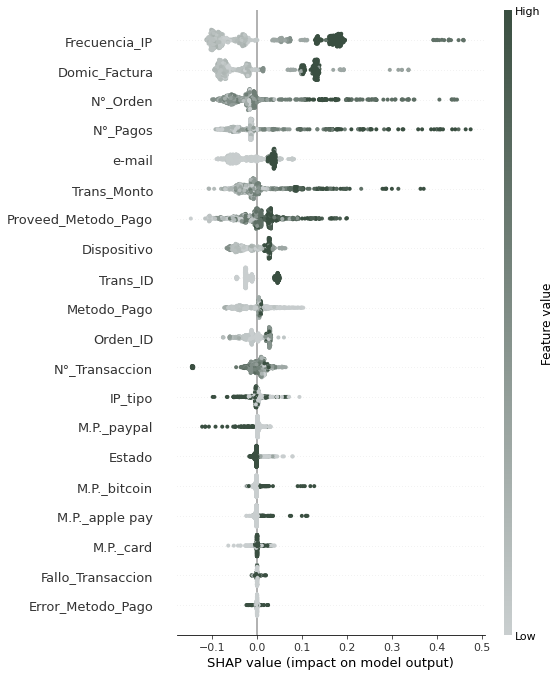

In [60]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import LinearSegmentedColormap # Porque voy a cambiar el mapa de colores.
import shap

rf = RandomForestClassifier(n_estimators=300, random_state=42) # Codigo para entrenamiento
rf.fit(X, y)

explainer = shap.TreeExplainer(rf)     # utilizo modelo tipo árbol
shap_values = explainer.shap_values(X) 

# Grafico
cmap_personalizado = LinearSegmentedColormap.from_list("mi_cmap", ["#C9CECF", "#3A4F41"]) # Mapa de colores
plt.figure(figsize=(18,6))
shap.summary_plot(shap_values[:, :, 1], X, cmap=cmap_personalizado)

El grafico de SHAP muestra cómo influye cada variable, hacia que lado empuja la predicción y con que valores ocurre, si es positivo empuja hacia ser fraude, si es negativo empuja hacia no fraude. Cada punto representa una transacción del dataset, en verde los valores altos de la variable, si se representa en gris es un valor bajo.

|Caracteristica|	|Lo que observo|	|Que puede estar pasando|
|:--|:--:|:--:|:--:|:--|
|Frecuencia_IP|	|Muchos puntos verdes empujan hacia fraude|	|IPs con alta frecuencia están asociadas a comportamiento riesgoso esto podría ser una automatización o abuso.|
|Domic_Factura|	|Muy repetidos en un valor|	|Cambios o domicilios poco habituales pueden ser señal.|
|N°_Orden / N°_Pagos|	|Muchos puntos verdes hacia el lado positivo|	|Usuarios con muchas órdenes y pagos incrementan la probabilidad de fraude. Patrón típico cuando prueban repetidamente.|
|e-mail|	|Rango pequeño con impacto en positivo|	|Puede estar codificada de forma que discrimina correos sospechosos vs confiables. Y esto empuja a determinar cuales son fraude.|
|Trans_Monto|	|Valores altos desplazan hacia el fraude|	|Montos elevados son un disparador fuerte para el modelo.|

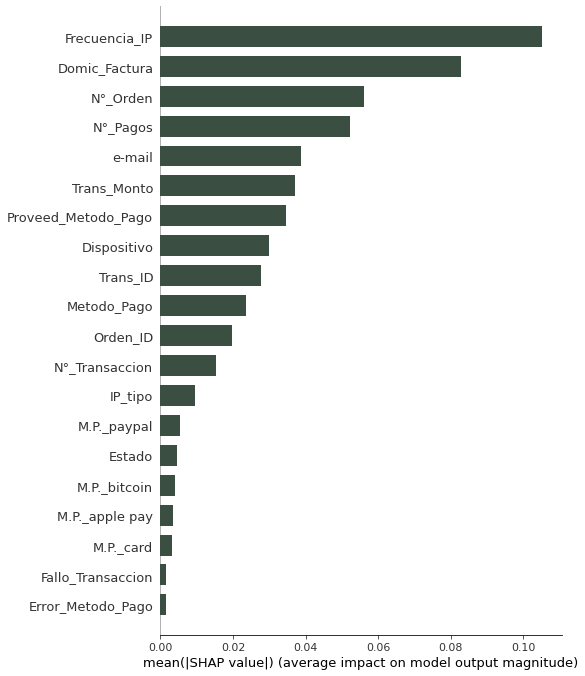

In [61]:
shap.summary_plot(shap_values[:, :, 1], X, plot_type="bar", color="#3A4F41")

Este gráfico no indica si una característica empuja la predicción hacia fraude o hacia no fraude. Lo que muestra es la magnitud de la contribución de cada feature, es decir, cuánto pesa en el modelo. El resultado es más limpio visualmente, pero no distingue si el efecto es positivo o negativo.

##### Auditoría de decisiones del modelo

Se muestran tres observaciones del dataset para evaluar de manera puntual el comportamiento del modelo. Esto permite identificar la clasificación asignada, el nivel de certeza y las features que generan mayor impacto en la decisión final, tanto para favorecer el diagnóstico de fraude como para descartarlo.

In [62]:
from IPython.display import HTML, display

shap.initjs() 

i = 10 # Tomo muestra 10 para ver que decisión toma.
force_1 = shap.force_plot(
    explainer.expected_value[1],
    shap_values[i,:,1],
    X.iloc[i,:]

)
# Codigo para que salga centrado el grafico y mas pequeño.
display(HTML(f"""
<div style="width:800px; height:250px; margin:center; overflow:hidden;">
    {force_1.html()}
</div>
"""))

En este gráfico se observa la contribución individual de cada variable sobre la predicción del modelo para un registro específico. El eje horizontal representa la probabilidad estimada de fraude: hacia la izquierda se encuentran los valores que reducen el riesgo y hacia la derecha aquellos que lo incrementan.

El modelo parte de un base value de 0.5537 que corresponde al nivel promedio de predicción considerando el comportamiento general del dataset. Sin embargo para este caso puntual el modelo arriba a un resultado de f(x) = 0.06, muy por debajo del punto de referencia por lo que el registro es clasificado como "No Fraude" con un nivel de certeza elevado.

Visualmente predomina el color azul, lo que indica que prácticamente todas las variables aportan a disminuir la probabilidad de fraude. Además las características aparecen ordenadas de acuerdo con su impacto relativo donde las primeras en la lista son las que mayor influencia tuvieron en el resultado final, todas direccionando la decisión hacia "no fraude".

Conclusión:
Este cliente presenta un perfil consistente con un comportamiento legítimo. No se identifican variables con señales relevantes de riesgo y de hecho la totalidad de las caracteristicas actúan en sentido negativo al fraude, empujando la predicción de manera clara hacia una decisión no fraudulenta.

In [63]:
from IPython.display import HTML, display

shap.initjs()

i = 15
force_15 = shap.force_plot(
    explainer.expected_value[1],
    shap_values[i,:,1],
    X.iloc[i,:]
)

display(HTML(f"""
<div style="width:800px; height:250px; margin:center; overflow:hidden;">
    {force_15.html()}
</div>
"""))

En esta otra operación, la predicción final del modelo fue de 1.00 (muy alta probabilidad de fraude). El modelo partió de un valor base de 0.55 y a partir de ahí las variables empujaron el resultado a clasificar como "fraude".
Las variables con mas fuerza:

- Trans_Monto = 69, monto alto, aumentó el riesgo	
- N°_Pagos = 6, muchas transacciones previas, aumento el riesgo 	
- N°_Orden = 7, muchas ordenes distintas, tambien aumento el riesgo	

Estas tres características están actuando como señales fuertes de comportamiento anómalo o inusual, comparado con la base poblacional. El gráfico indica que fueron lo suficientemente fuertes para elevar el score desde 0.55 hasta 1.00. Representa un perfil típico donde operar el cliente con señales históricas claras, pero actividad reciente agresiva y monetariamente elevada.


In [64]:
from IPython.display import HTML, display

shap.initjs()

i = 20
force_15 = shap.force_plot(
    explainer.expected_value[1],
    shap_values[i,:,1],
    X.iloc[i,:]
)

display(HTML(f"""
<div style="width:800px; height:250px; margin:center; overflow:hidden;">
    {force_15.html()}
</div>
"""))


En este caso al igual que en el análisis anterior, la operación fue clasificada como Fraude. El modelo parte de un base value de 0.5537 y a partir de la contribución de las variables, el valor final asciende a 0.83 superando claramente el umbral de decisión.

Las características señaladas en rojo representan los factores que incrementaron la probabilidad de fraude. Estas variables ubicadas hacia la derecha del eje horizontal fueron las que ejercieron mayor influencia positiva sobre la predicción. Si bien existen algunas variables en azul que actuaron en sentido opuesto, su impacto fue insuficiente para contrarrestar el empuje de las variables de riesgo.

## ❑ LightGBM (Ligth Gradient Boosting Machine)

Tal como habia previsto al comienzo, comencé utilizando un Random Forest como modelo de referencia. Ahora avanzaré con la implementación de LightGBM sobre este mismo conjunto de datos con el objetivo de comparar el desempeño de ambos algoritmos y determinar cuál resulta más adecuado para el caso.

In [65]:
import lightgbm as lgb # Importo la libreria lightGMB.
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y = data["Fraude"] # Aca le pido que Y sea mi objetivo a predecir
X = data.drop(["Fraude"], axis=1) # Variables dependientes todas del DF menos Fraude.

In [66]:
# Division de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y 
)

In [67]:
# Parámetros de LightGBM
params = {
    'objective': 'binary',            # Clasificación binaria
    'metric': 'auc',                  # Métrica de evaluación: (AUC)
    'boosting_type': 'gbdt',          # Tipo de algoritmo boosting va a utilizar el modelo para construir los árboles (dart, goss, rf)
    'n_estimators': 300,              # Número de árboles
    'learning_rate': 0.05,            # Tasa de aprendizaje, hasta 0,05 el aprendizaje es más suave, mejor generalización
    'num_leaves': 45,                 # Máximo número de hojas por árbol, más hojas mayor capacidad de aprendizaje pero más riesgo de sobreajuste
    'verbose': -1,                    # Suprimir mensajes de salida, silencia prácticamente toda la salida informativa del proceso.
    'n_jobs': -1,                     # Usar todos los núcleos de CPU disponibles
    'seed': 42                        # Aleatoriedad, fijada en el 42.
}

In [68]:
# Inicializo y entreno el modelo
modelo_lgbm = lgb.LGBMClassifier(**params)

# early_stopping_rounds es para detener el entrenamiento si la métrica no mejora
# Esto requiere un conjunto de validación separado (eval_set)
modelo_lgbm.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Conjunto para monitorear el rendimiento
    eval_metric='auc',
    callbacks=[lgb.early_stopping(10, verbose=False)] # Detener si no mejora en 10 rondas
)

LGBMClassifier(learning_rate=0.05, metric='auc', n_estimators=300, n_jobs=-1,
               num_leaves=45, objective='binary', seed=42, verbose=-1)

In [69]:
y_pred_proba = modelo_lgbm.predict_proba(X_test)[:, 1] # Predicción de probabilidades (necesito para calcular AUC)

y_pred = modelo_lgbm.predict(X_test) # Predicción de clases (necesaria para Exactitud)

In [70]:
# Evaluar el Rendimiento del Modelo y mostrar en pantalla.
print("--- Resultados de Evaluación ---")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred):.4f}")

conf_mat = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:\n", conf_mat)


--- Resultados de Evaluación ---
ROC-AUC Score: 0.9738
Precisión (Accuracy): 0.9146

Matriz de Confusión:
 [[72  1]
 [13 78]]


<div class="alert alert-warning">\begin{bmatrix}
72 & 1 \\
13 & 78
\end{bmatrix}

El modelo LightGBM es bueno para evitar alarmas falsas ya que solo cometió 1 error sobre 73 casos no fraudulentos. Pero donde falla más es en fraudes no detectados con 13 casos perdidos. Como el estudio es sobre detección de fraudes, este tipo de error es el más costoso porque significa que hay fraudes que pasan sin bloquearse.</div>

## <div style = 'background-color:black'> <center><font color='white'>④ Conclusiones </font></div><a id="3"></a>

<div class="alert alert-warning">Comparando ambos modelos: 

\
\begin{aligned}
\textbf{Random Forest} & \qquad\qquad & \textbf{LightGBM} \\
\begin{bmatrix}
93 & 17 \\
1 & 135
\end{bmatrix}
& &
\begin{bmatrix}
72 & 1 \\
13 & 78
\end{bmatrix}
\end{aligned}

Random Forest es más estricto al detectar fraudes, casi no deja pasar ninguno, pero tiene un costo operativo: genera muchos avisos falsos. LightGBM es más conservador, comete menos falsos positivos, pero corre el riesgo de que operaciones fraudulentas pasen inadvertidas.

LightGBM podría ajustarse más o combinarse con Random Forest mediante un ensemble de voting, pero se deja aquí para no alargar demasiado este notebook.</div>

\
\begin{bmatrix}
\text{TN} & \text{FP} \\
\text{FN} & \text{TP}
\end{bmatrix}

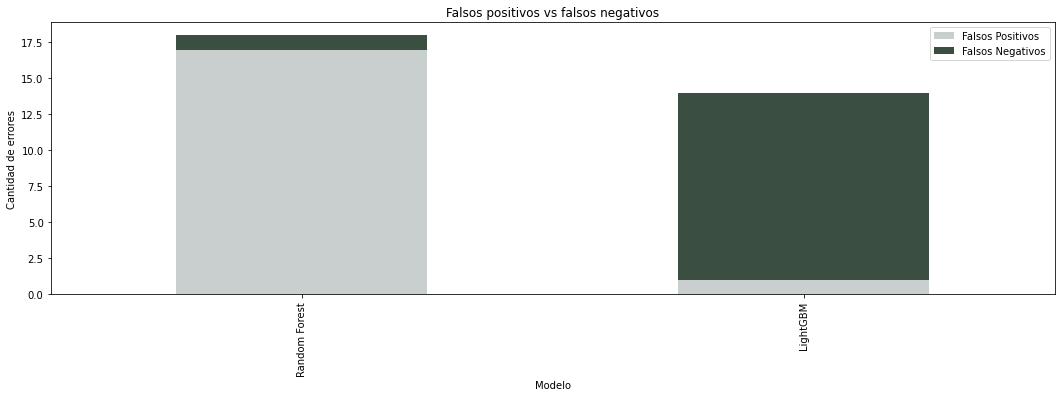

In [72]:
errors = pd.DataFrame({
    'Modelo': ['Random Forest','LightGBM'],
    'Falsos Positivos': [17,1],
    'Falsos Negativos': [1,13]
})
errors.set_index('Modelo').plot(kind='bar', stacked=True, figsize=(18,5), color=['#C9CECF','#3A4F41'])
plt.ylabel('Cantidad de errores')
plt.title('Falsos positivos vs falsos negativos')
plt.show()

---
✍️ Autor: Néstor Díaz — Contador Público | Analista de Datos | Machine Learning

📅 Proyecto: Machine Learning aplicado a la detección de fraudes en E-commerce

---